In [16]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pickle
import math
from sklearn.utils import shuffle
import tensorflow as tf
from sklearn.model_selection import train_test_split
import time

In [10]:
pickle_in=open("DogCatX.pickle",'rb')
DogCatX=pickle.load(pickle_in)
pickle_in.close()
pickle_in=open('DogCaty.pickle','rb')
DogCaty=pickle.load(pickle_in)
pickle_in.close()
DogCatX.shape

(24946, 50, 50)

In [35]:
DogCatX,DogCaty=shuffle(DogCatX,DogCaty,random_state=0)
X_train,X_test,y_train,y_test=train_test_split(DogCatX,DogCaty,random_state=5,test_size=0.25)
y_train=np.array(y_train)
y_test=np.array(y_test)
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1)

In [62]:
train_size=list(range(2,11,2))
train_size[:]=[x/10 for x in train_size]
errorate_train=[]
errorate_test=[]
learn_time=[]
for n in train_size:
    X_train,y_train=shuffle(X_train,y_train,random_state=0)
    X_train_sub=X_train[:int(len(X_train)*n)]
    y_train_sub=y_train[:int(len(y_train)*n)]
    time_start=time.clock()
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1000,activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(1000,activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.fit(X_train_sub,y_train_sub,epochs=15)    
    errorate_train.append(1-model.evaluate(X_train_sub,y_train_sub)[1])
    errorate_test.append(1-model.evaluate(X_test,y_test)[1])  
    learn_time.append(time.clock()-time_start)    

Epoch 1/15
3741/3741 [==============================] - 10s 3ms/step - loss: 0.7122 - acc: 0.5143
Epoch 2/15
3741/3741 [==============================] - 8s 2ms/step - loss: 0.6863 - acc: 0.5504
Epoch 3/15
3741/3741 [==============================] - 7s 2ms/step - loss: 0.6766 - acc: 0.5600
Epoch 4/15
3741/3741 [==============================] - 7s 2ms/step - loss: 0.6759 - acc: 0.5541
Epoch 5/15
3741/3741 [==============================] - 7s 2ms/step - loss: 0.6625 - acc: 0.5886
Epoch 6/15
3741/3741 [==============================] - 7s 2ms/step - loss: 0.6622 - acc: 0.5916
Epoch 7/15
3741/3741 [==============================] - 7s 2ms/step - loss: 0.6535 - acc: 0.6055
Epoch 8/15
3741/3741 [==============================] - 7s 2ms/step - loss: 0.6473 - acc: 0.6137
Epoch 9/15
3741/3741 [==============================] - 8s 2ms/step - loss: 0.6578 - acc: 0.6017
Epoch 10/15
3741/3741 [==============================] - 8s 2ms/step - loss: 0.6424 - acc: 0.6204
Epoch 11/15
3741/3741 [=====

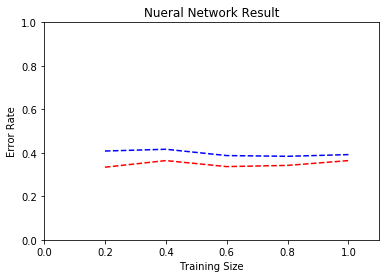

In [63]:
plt.plot(train_size,errorate_train,'r--',train_size,errorate_test,'b--')
plt.axis([0,1.1,0,1])
plt.ylabel('Error Rate')
plt.xlabel('Training Size')
plt.title('Nueral Network Result')
plt.savefig('E:/Machine Learning/HW1/DogCat/DogCat_NNW_Error.png')

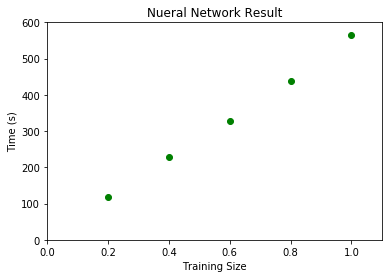

In [71]:
plt.plot(train_size,learn_time,'go')
plt.axis([0,1.1,0,600])
plt.ylabel('Time (s)')
plt.xlabel('Training Size')
plt.title('Nueral Network Result')
plt.savefig('E:/Machine Learning/HW1/DogCat/DogCat_NNW_T.png')

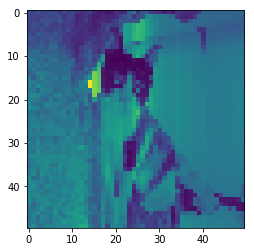

In [42]:
plt.imshow(X_train[0])
plt.show()

In [68]:
errorate_test

[0.4082090747992886,
 0.4163860830623063,
 0.38736572081373344,
 0.38399871746584335,
 0.3918550586364047]

In [69]:
learn_time

[118.05714598376653,
 229.30837363615865,
 328.89557863415394,
 437.12913204285724,
 564.9517326194764]

In [72]:
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1000,activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(1000,activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(2,activation=tf.nn.softmax))
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    history=model.fit(X_train,y_train,epochs=15,validation_data = (X_test, y_test))  

Train on 18709 samples, validate on 6237 samples
Epoch 1/15
18709/18709 [==============================] - 48s 3ms/step - loss: 0.6919 - acc: 0.5334 - val_loss: 0.6757 - val_acc: 0.5831
Epoch 2/15
18709/18709 [==============================] - 44s 2ms/step - loss: 0.6709 - acc: 0.5838 - val_loss: 0.6790 - val_acc: 0.5552
Epoch 3/15
18709/18709 [==============================] - 43s 2ms/step - loss: 0.6649 - acc: 0.5942 - val_loss: 0.6624 - val_acc: 0.6059
Epoch 4/15
18709/18709 [==============================] - 50s 3ms/step - loss: 0.6591 - acc: 0.6015 - val_loss: 0.6558 - val_acc: 0.6097
Epoch 5/15
18709/18709 [==============================] - 45s 2ms/step - loss: 0.6572 - acc: 0.6030 - val_loss: 0.6593 - val_acc: 0.6008
Epoch 6/15
18709/18709 [==============================] - 48s 3ms/step - loss: 0.6530 - acc: 0.6132 - val_loss: 0.6534 - val_acc: 0.6178
Epoch 7/15
18709/18709 [==============================] - 48s 3ms/step - loss: 0.6514 - acc: 0.6112 - val_loss: 0.6551 - val_acc:

In [76]:
epoch=list(range(1,16))

In [100]:
acc=[1-x for x in history.history['acc']]
test_acc=[1-x for x in history.history['val_acc']]

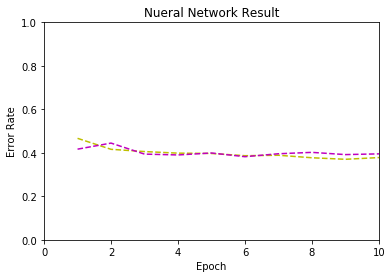

In [101]:
plt.plot(epoch,acc,'y--',epoch,test_acc,'m--')
plt.axis([0,10,0,1])
plt.ylabel('Error Rate')
plt.xlabel('Epoch')
plt.title('Nueral Network Result')
plt.savefig('E:/Machine Learning/HW1/DogCat/DogCat_NNW_Epoch_Error.png')